In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Calling Linear Regressor model from sklearn

In [68]:
# Load the dataset
df = pd.read_csv('Salary_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.shape)

(30, 2)


In [69]:
df.sample(4)

,YearsExperience,Salary
16,5.2,66030.0
8,3.3,64446.0
15,5.0,67939.0
22,8.0,101303.0


Text(0, 0.5, 'Salary (Dependent Variable)')

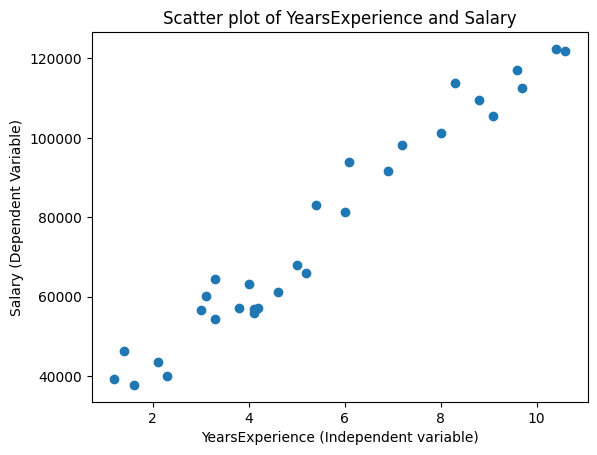

In [70]:
# Lets plot the data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Scatter plot of YearsExperience and Salary')
plt.xlabel('YearsExperience (Independent variable)')
plt.ylabel('Salary (Dependent Variable)')

The data looks like sort of linear and in this regression model we have to predict **Salary** based on **YearsExperience**.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [72]:
# Spliting the data 
X = df[['YearsExperience']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


In [74]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(X_test)
y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

In [76]:
X_test

,YearsExperience
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3
9,3.8


In [77]:
y_test

,Salary
27,112636.0
15,67939.0
23,113813.0
17,83089.0
8,64446.0
9,57190.0


In [78]:
lr.predict(X_test.iloc[0].values.reshape(1, 1))

c:\Users\Admin\.conda\envs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[115791.21011287]])

Original Salary correspoding to 9.7 YearsExperience is 112630 but our model predicted 115791.

Let's see what are the values of our model's $\beta_o$ and $\beta$.

In [79]:
beta_o = lr.intercept_
beta = lr.coef_
print(beta_o)
print(beta)

[24380.20147947]
[[9423.81532303]]


Text(0, 0.5, 'Salary (Dependent Variable)')

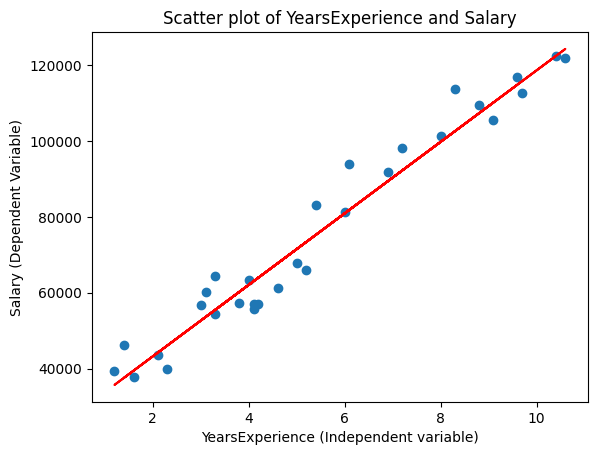

In [80]:
# Now lets plot the best fitted line in our data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Scatter plot of YearsExperience and Salary')
plt.xlabel('YearsExperience (Independent variable)')
plt.ylabel('Salary (Dependent Variable)')